In [16]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    classification_report
)

import matplotlib.pyplot as plt
import joblib


In [17]:
X_train_res = joblib.load("X_train_res.pkl")
y_train_res = joblib.load("y_train_res.pkl")
X_test = joblib.load("X_test.pkl")
y_test = joblib.load("y_test.pkl")


In [18]:
rf_tuned = RandomForestClassifier(
    n_estimators=300,   # more trees
    max_depth=15,       # limit depth to prevent overfitting
    random_state=42,
    n_jobs=-1
)
rf_tuned.fit(X_train_res, y_train_res)


RandomForestClassifier(max_depth=15, n_estimators=300, n_jobs=-1,
                       random_state=42)

In [19]:
y_pred_tuned = rf_tuned.predict(X_test)


In [20]:
print("Tuned Random Forest Results:\n")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Precision:", precision_score(y_test, y_pred_tuned))
print("Recall:", recall_score(y_test, y_pred_tuned))
print("F1 Score:", f1_score(y_test, y_pred_tuned))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))


Tuned Random Forest Results:

Accuracy: 0.9990168884519505
Precision: 0.6693548387096774
Recall: 0.8469387755102041
F1 Score: 0.7477477477477478

Confusion Matrix:
 [[56823    41]
 [   15    83]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.67      0.85      0.75        98

    accuracy                           1.00     56962
   macro avg       0.83      0.92      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [21]:
y_probs = rf_tuned.predict_proba(X_test)[:,1]


In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)


In [23]:
auc = roc_auc_score(y_test, y_probs)
print("AUC Score:", auc)


AUC Score: 0.981926982244783


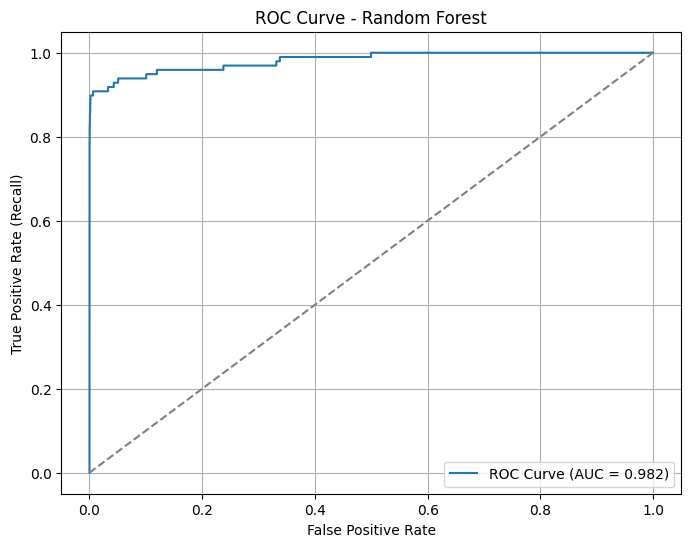

In [24]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.3f})".format(auc))
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid()
plt.show()


In [25]:
joblib.dump(rf_tuned, "random_forest_tuned_model.pkl")


['random_forest_tuned_model.pkl']